In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize( (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) )])

In [3]:
download_path = "../prototype/pytorch_prototype/data"

trainset = torchvision.datasets.CIFAR10(
    root=download_path,
    train=True,
    download=True,
    transform=transform)

testset = torchvision.datasets.CIFAR10(
    root=download_path,
    train=False,
    download=True,
    transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import random

# 複数クラスラベルのデータセットから指定クラスラベルの1データセットを取得
def get_one_label_data(class_label, dataset):
    new_data = []
    for data in dataset:
        label = data[1]
        if label == class_label:
            new_data.append(data)
    return new_data

# 複数クラスラベルのデータセットから指定クラスラベルのtrain, testデータセットを取得
def get_one_label_dataset(class_label, train, test):
    train = get_one_label_data(class_label, train)
    test = get_one_label_data(class_label, test)
    return train, test

# 1データセットのラベルを指定のラベルに変更
def change_label_data(new_label, dataset):
    new_data = []
    for data in dataset:
        new_data.append((data[0], new_label))
    return new_data

# train, testデータセットのラベルを指定のラベルに変更
def change_label_dataset(new_label, train, test):
    train = change_label_data(new_label, train)
    test = change_label_data(new_label, test)
    return train, test

# 指定データ数分のtrainデータをランダムに取得
# data_n: 1クラスのデータ数
def choice_train_at_random(data_n, train):
    train = random.sample(train, data_n)
    return train

# 指定クラスラベルリストのtrain, testデータセットを取得
def get_specific_label_dataset(class_label_list, train, test, data_n=None):
    new_train = []
    new_test = []
    for i, label in enumerate(class_label_list):
        got_train, got_test = get_one_label_dataset(label, train, test)
        got_train, got_test = change_label_dataset(i, got_train, got_test)
        if data_n != None:
            got_train = choice_train_at_random(data_n, got_train)
        new_train += got_train
        new_test += got_test
    return new_train, new_test

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [6]:
class_label_list = [1,2,8]
new_train, new_test = get_specific_label_dataset(class_label_list, trainset, testset)

In [7]:
print(len(new_train))
print(len(new_test))

15000
3000


In [55]:
batch_size = 128

trainloader = torch.utils.data.DataLoader(
    new_train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2)

testloader = torch.utils.data.DataLoader(
    new_test,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2)

In [56]:
(inputs, labels) = testloader.__iter__()._next_data()

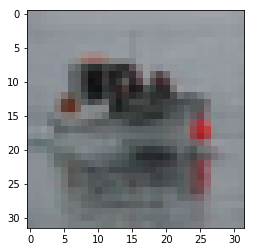

正解ラベル: ship
予測ラベル: ship


In [57]:
# 推論
from test_assets.model import pytorch_cifar10

classes = ["automobile", "bird", "ship"]
param_path = "./test_assets/learned_model/v8.pth"
param = torch.load(param_path)
model = pytorch_cifar10.LeNet(3)
model.load_state_dict(param)

output, feature = model(inputs)
_, predicted = torch.max(output, 1)

index = 0

imshow(torchvision.utils.make_grid(inputs[index]))
print("正解ラベル: {0}".format(classes[labels[index].item()]))
print("予測ラベル: {0}".format(classes[predicted[index].item()]))

In [58]:
predicted == labels

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False, False,
        False,  True,  True,  True, False,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True])

In [66]:
labels

tensor([2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1,
        2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0,
        0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0,
        1, 2, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2,
        1, 2, 2, 2, 1, 2, 1, 0])

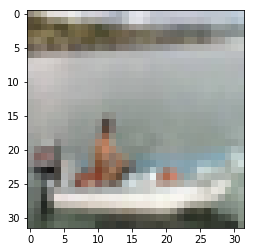

正解ラベル: ship


/Users/ootaryuunosuke/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/__init__.py:1717: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


<Container object of 500 artists>

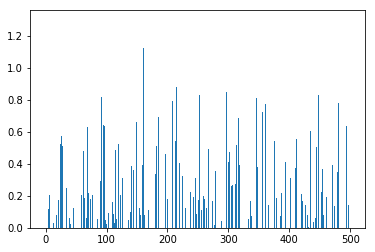

In [68]:
import numpy as np
import matplotlib.pyplot as plt

index = 1

imshow(torchvision.utils.make_grid(inputs[index]))
print("正解ラベル: {0}".format(classes[labels[index].item()]))
left = np.arange(0,500)
height = feature[index].data
plt.bar(left=left, height=height)